/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


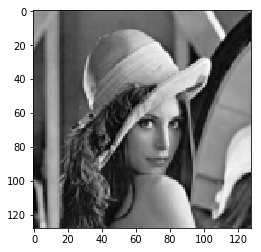

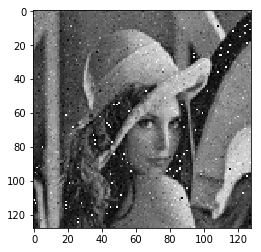

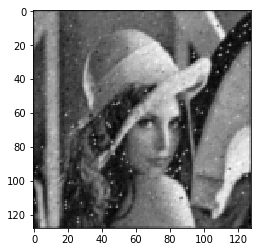

102.49853515625


In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy
import scipy.misc

def read_image(name):
    image = scipy.misc.imread(name,flatten=True)
    image = scipy.misc.imresize(image,(128,128),'bilinear')
    return image
    
def show_image(image):
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(image, noise_percent):
    rows=image.shape[0]    
    cols=image.shape[1]    
    area=rows*cols
    loc_flip=np.random.randint(0,area,int(area*noise_percent))
    mean = 0
    variance = 10
    gauss = np.random.normal(mean,variance,area)
    for ii in loc_flip:
        locr=int(ii/cols)
        locc=(ii%cols)
        image[locr,locc]=image[locr,locc] + int(gauss[ii])
        if image[locr,locc] < 0:
            image[locr,locc] = 0
        if image[locr,locc] > 255:
            image[locr, locc] = 255
    return image

def ICM(noisy_image):
    h = 1.0
    beta = 1.0
    eta = 2.1
    image1 = noisy_image
    for row in range(image1.shape[0]):
        for col in range(image1.shape[1]):
            image1[row,col] = min_energy(noisy_image, image1, row, col, h, beta, eta)
    return image1
            

def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def MSE(denoised_image, image):
    mse = ((denoised_image - image)**2).mean(axis=None)
    return mse


if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image1=read_image(name)
    image2=read_image(name)
    show_image(image1)
    noisy_image=add_noise(image1,noise_percent=0.90)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    mse = MSE(denoised_image,image2)
    show_image(denoised_image)
    print(mse)

In [ ]:
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
        if row > 1:
            pixel += 2*beta*image[row-2,col]
        if col > 1:
            pixel += 2*beta*image[row-1,col-1]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def min_energy(noisy_image,image,row,col,h,beta,eta):
    sub_pixel = 2*eta*noisy_image[row,col]
    main_pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        if row > 1:
            sub_pixel += 2*beta*image[row-2,col]
        if col > 1:
            sub_pixel += 2*beta*image[row-1,col-1]
        if col < image.shape[1]-1:
            sub_pixel += 2*beta*image[row-1,col+1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col > 0:
        if col > 1:
            sub_pixel += 2*beta*image[row, col-2]
        if row > 1:
            sub_pixel += 2*beta*image[row-1, col]
        if row < image.shape[0]-1:
            sub_pixel += 2*beta*image[row+1, col-1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

ValueError: x and y must have same first dimension, but have shapes (256, 1) and (1,)

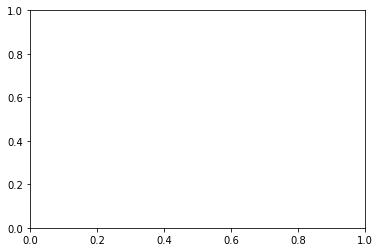

In [137]:
import plotly.plotly as py
import plotly.tools as tls
import operator
from sklearn import mixture

#print(min(image2.flatten()), np.max(image2.flatten()))
histo = np.histogram(image2.flatten(), range=(0, 255), bins = 255)

histo0 = np.concatenate(([0], histo[0]), axis=0)

prob_x_ij = histo0/np.sum(histo0)
pixel_values = histo[1]
#plt.plot(pixel_values, prob_x_ij)

#print(sum(pixel_values*prob_x_ij))

#plt.figure()
#plt.scatter(pixel_values, prob_x_ij)

#n, bins, patches = plt.hist(image2.flatten(), range=(0,255), bins = 255, density = True,facecolor='g', alpha=0.75)



data = np.array(prob_x_ij).reshape(-1,1)
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
h = clf.fit(data)

x = np.array(pixel_values).reshape(-1,1)
y = clf.score_samples(x)

plt.plot(x,h)
plt.show()


In [75]:
np.arange(256)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18